Documentation: 

- used nltk libraries for stopword,wordnet lemmatizer

- haven't removed numbers from the text,as they used in naming some companies



In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
us_data = pd.read_csv("crunchbase_US_data.csv")
us_data.head()

,Unnamed: 0,company_name,description,website,funding,industries,num_employees,headquarters,founded_date,industry_groups,full_description,filter
0,0,1 Accord Technologies,1 Accord Technologies has been providing profe...,https://www.ashton-group.com/,Na,"Consulting, Cyber Security, Hardware, IT Mana...",01 to 10,"Eatonton, Georgia, United States",2018,"Hardware, Information Technology, Privacy and...",—,Software-2018
1,1,1005 Ventures,Venture Capital,http://www.1005ventures.com,Na,"Information Technology, Internet, Venture Cap...",01 to 10,"San Francisco, California, United States",2018,"Financial Services, Information Technology, I...",1005 ventures is set up to invest in start-ups...,Software-2018
2,2,"1533 Systems, Inc.","Live Data platform, ingest, process, respond a...",http://1533.io,Na,"Analytics, Information Technology, Software, ...",01 to 10,"Campbell, California, United States",2018,"Content and Publishing, Data and Analytics, I...",1533 Systems is building the next generation d...,Software-2018
3,3,17 TeraWatts,17 TeraWatts is a clean energy software company.,https://www.17terawatts.com/,Na,"Clean Energy, Energy, Information Technology,...",01 to 10,"Austin, Texas, United States",2018-01-01 00:00:00,"Energy, Information Technology, Software, Sus...",—,Software-2018
4,4,3DIQ,3DIQ makes it beyond easy for recruiters to ed...,https://www.3diq.com,Na,"Recruiting, Software",01 to 10,"Knoxville, Tennessee, United States",2018,"Professional Services, Software",3DIQ is a recruiter’s secret weapon. We make i...,Software-2018


In [4]:
def clean_text(text):

  """util function to clean the text"""

  text = str(text).lower()
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.,*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

  return text

In [5]:

stop_words = stopwords.words('english')

In [6]:
lemmatizer = WordNetLemmatizer()

In [15]:

def preprocess_textdata(text):

  """util function to preprocess text data"""

  text = clean_text(text)
  text = ' '.join(w for w in text.split(' ') if w not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(w) for w in text.split(' '))

  return text

In [16]:
us_data['description'] = us_data['description'].apply(preprocess_textdata)

In [17]:
us_data.head()

,Unnamed: 0,company_name,description,website,funding,industries,num_employees,headquarters,founded_date,industry_groups,full_description,filter,cleaned_description
0,0,1 Accord Technologies,1 accord technology providing professional sup...,https://www.ashton-group.com/,Na,"Consulting, Cyber Security, Hardware, IT Mana...",01 to 10,"Eatonton, Georgia, United States",2018,"Hardware, Information Technology, Privacy and...",—,Software-2018,1 accord technology providing professional sup...
1,1,1005 Ventures,venture capital,http://www.1005ventures.com,Na,"Information Technology, Internet, Venture Cap...",01 to 10,"San Francisco, California, United States",2018,"Financial Services, Information Technology, I...",1005 ventures is set up to invest in start-ups...,Software-2018,venture capital
2,2,"1533 Systems, Inc.",live data platform ingest process respond oper...,http://1533.io,Na,"Analytics, Information Technology, Software, ...",01 to 10,"Campbell, California, United States",2018,"Content and Publishing, Data and Analytics, I...",1533 Systems is building the next generation d...,Software-2018,live data platform ingest process respond oper...
3,3,17 TeraWatts,17 terawatts clean energy software company,https://www.17terawatts.com/,Na,"Clean Energy, Energy, Information Technology,...",01 to 10,"Austin, Texas, United States",2018-01-01 00:00:00,"Energy, Information Technology, Software, Sus...",—,Software-2018,17 terawatts clean energy software company
4,4,3DIQ,3diq make beyond easy recruiter edit format ge...,https://www.3diq.com,Na,"Recruiting, Software",01 to 10,"Knoxville, Tennessee, United States",2018,"Professional Services, Software",3DIQ is a recruiter’s secret weapon. We make i...,Software-2018,3diq make beyond easy recruiter edit format ge...


In [18]:
us_data_descr = us_data.iloc[:,1:]
us_data_descr

,company_name,description,website,funding,industries,num_employees,headquarters,founded_date,industry_groups,full_description,filter,cleaned_description
0,1 Accord Technologies,1 accord technology providing professional sup...,https://www.ashton-group.com/,Na,"Consulting, Cyber Security, Hardware, IT Mana...",01 to 10,"Eatonton, Georgia, United States",2018,"Hardware, Information Technology, Privacy and...",—,Software-2018,1 accord technology providing professional sup...
1,1005 Ventures,venture capital,http://www.1005ventures.com,Na,"Information Technology, Internet, Venture Cap...",01 to 10,"San Francisco, California, United States",2018,"Financial Services, Information Technology, I...",1005 ventures is set up to invest in start-ups...,Software-2018,venture capital
2,"1533 Systems, Inc.",live data platform ingest process respond oper...,http://1533.io,Na,"Analytics, Information Technology, Software, ...",01 to 10,"Campbell, California, United States",2018,"Content and Publishing, Data and Analytics, I...",1533 Systems is building the next generation d...,Software-2018,live data platform ingest process respond oper...
3,17 TeraWatts,17 terawatts clean energy software company,https://www.17terawatts.com/,Na,"Clean Energy, Energy, Information Technology,...",01 to 10,"Austin, Texas, United States",2018-01-01 00:00:00,"Energy, Information Technology, Software, Sus...",—,Software-2018,17 terawatts clean energy software company
4,3DIQ,3diq make beyond easy recruiter edit format ge...,https://www.3diq.com,Na,"Recruiting, Software",01 to 10,"Knoxville, Tennessee, United States",2018,"Professional Services, Software",3DIQ is a recruiter’s secret weapon. We make i...,Software-2018,3diq make beyond easy recruiter edit format ge...
...,...,...,...,...,...,...,...,...,...,...,...,...
2991,ATX Advisory Services,atx fullservice consulting company partner div...,https://www.atxadvisory.com/,Na,"Big Data, Consulting, Project Management",01 to 10,"Biddeford, Maine, United States",2021,"Administrative Services, Data and Analytics, ...",—,software_2021,atx fullservice consulting company partner div...
2992,Arrive,arrive make investing vacation rental easy buy...,https://arrive.io,250000,"FinTech, Hospitality, Marketplace, Mobile App...",01 to 10,"Miami, Florida, United States",2021,"Apps, Commerce and Shopping, Financial Servic...",Arrive enables anyone anywhere to invest in va...,software_2021,arrive make investing vacation rental easy buy...
2993,ANV Team,anv team assist rapidly growing firm pharma so...,http://www.anvteam.com/,Na,"Industrial, Manufacturing",11 to 50,"Wimberley, Texas, United States",2021,Manufacturing,—,software_2021,anv team assist rapidly growing firm pharma so...
2994,Abbyya,retail gaming,https://www.abbyya.com,10000,"E-Commerce, Retail, Software",11 to 50,"Milpitas, California, United States",2021-01-01 00:00:00,"Commerce and Shopping, Software",—,software_2021,retail gaming


In [19]:
us_data_descr.to_csv("crunchbase_2017_2021_descr_cleaned.csv")

### Word Cloud

In [60]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(us_data['cleaned_description'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

word cloud

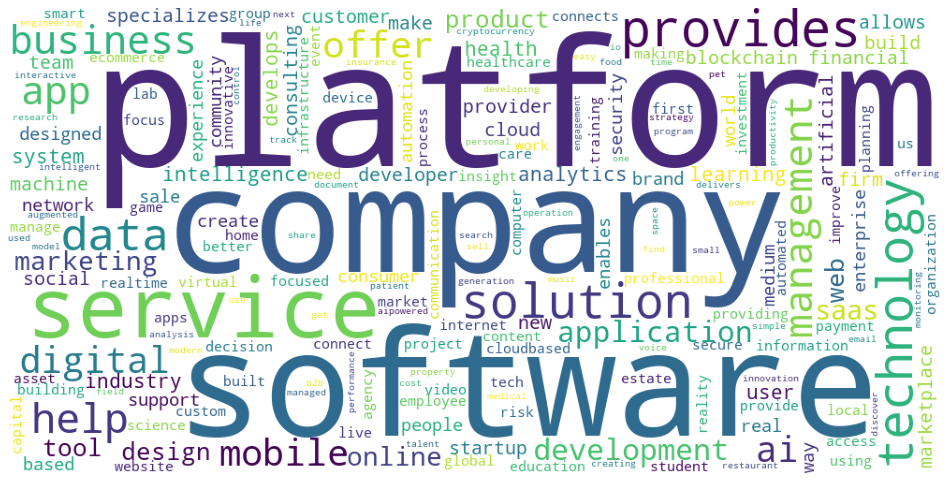

In [66]:
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()